# Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, 
confusion_matrix
from joblib import dump
import seaborn as sns

# Load dataset

In [2]:
df = pd.read_csv("car_sentiment_dataset_500.csv")
df.head()

,Review_English,Sentiment_Label
0,Fantastic mileage... when parked in the garage,Negative
1,Expensive spare parts and repairs,Negative
2,Handling is neither too g00d nor too bd,Neutral
3,"The car mileage is excellent, very fuel efficient",Positive
4,Too much vibration while driving,Negative


In [3]:
df.tail()

,Review_English,Sentiment_Label
495,Overall a great value for money car,Positive
496,Too much vibration while driving,Negative
497,The car is fine for city use,Neutral
498,Very comfortable for long drives,Positive
499,Expensive spare parts and repairs,Negative


In [4]:
df.describe()

,Review_English,Sentiment_Label
count,500,500
unique,54,3
top,"Comfort level is decent, not great",Positive
freq,19,171


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Review_English   500 non-null    object
 1   Sentiment_Label  500 non-null    object
dtypes: object(2)
memory usage: 7.9+ KB


In [6]:
# Keep only required columns
df = df[["Review_English", "Sentiment_Label"]]

# Normalize labels

In [7]:
df["Sentiment_Label"] = df["Sentiment_Label"].astype(str).str.strip().
str.title()

print("Dataset shape:", df.shape)
print(df.head())

Dataset shape: (500, 2)
                                      Review_English Sentiment_Label
0     Fantastic mileage... when parked in the garage        Negative
1                  Expensive spare parts and repairs        Negative
2            Handling is neither too g00d nor too bd         Neutral
3  The car mileage is excellent, very fuel efficient        Positive
4                   Too much vibration while driving        Negative


# 2. Sentiment Distribution

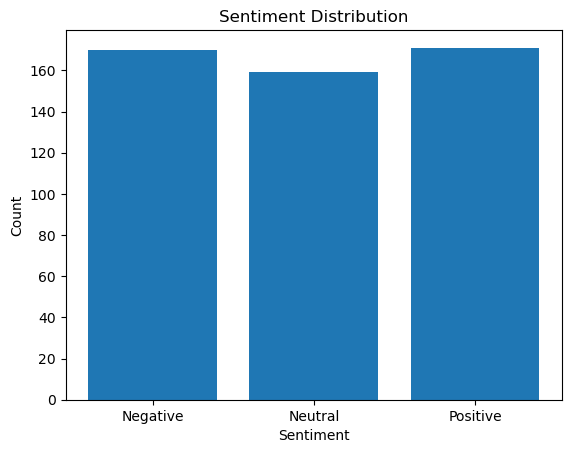

In [8]:
counts = Counter(df["Sentiment_Label"])
plt.bar(counts.keys(), counts.values())
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

# 3. Word Clouds

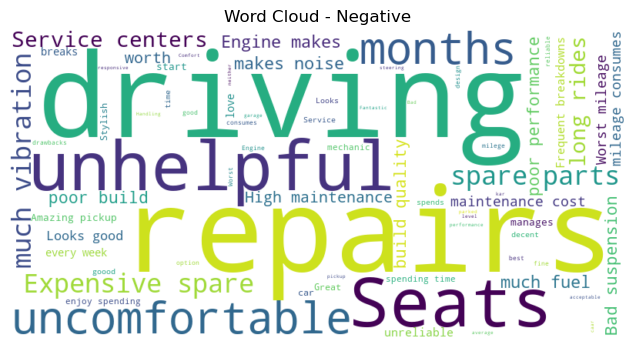

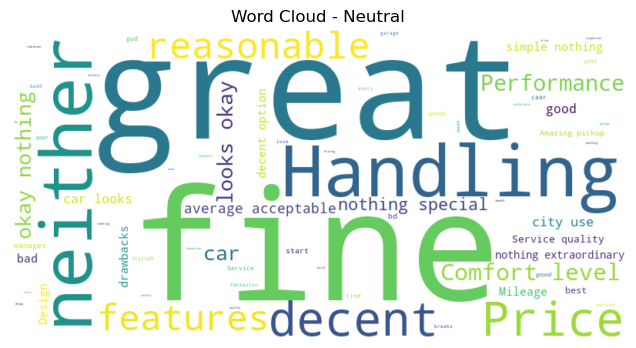

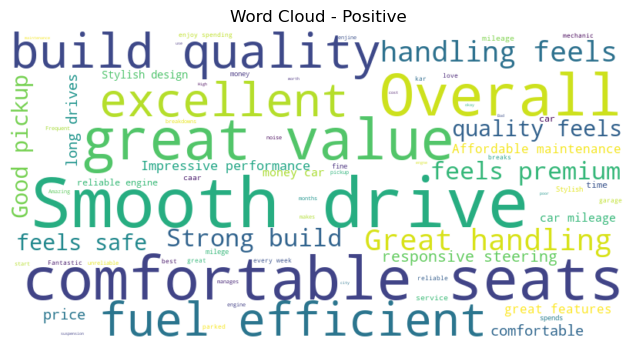

In [9]:
for sentiment in df["Sentiment_Label"].unique():
    text = " ".join(df[df["Sentiment_Label"] == sentiment]["Review_English"].
                    astype(str))
    wc = WordCloud(width=800, height=400, background_color="white").
    generate(text)
    plt.figure(figsize=(8,4))
    plt.imshow(wc, interpolation="bilinear")
    plt.title(f"Word Cloud - {sentiment}")
    plt.axis("off")
    plt.show()

# 4. Train/Test Split

In [10]:
X = df["Review_English"]
y = df["Sentiment_Label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                     random_state=42)

# 5. TF-IDF + Logistic Regression

In [11]:
vectorizer = TfidfVectorizer(max_features=3000, ngram_range=(1,2))
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

model = LogisticRegression(max_iter=500, class_weight="balanced")
model.fit(X_train_vec, y_train)
y_pred = model.predict(X_test_vec)

# 6. Evaluation

✅ Accuracy: 86.0

Classification Report:
               precision    recall  f1-score   support

    Negative       0.88      0.85      0.87        34
     Neutral       0.77      0.84      0.81        32
    Positive       0.94      0.88      0.91        34

    accuracy                           0.86       100
   macro avg       0.86      0.86      0.86       100
weighted avg       0.86      0.86      0.86       100



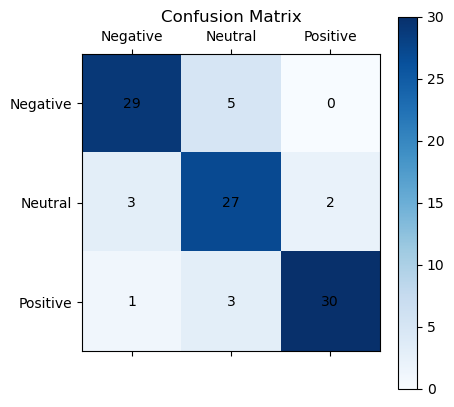

In [14]:

print("✅ Accuracy:", accuracy_score(y_test, y_pred)*100)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred, labels=["Negative","Neutral","Positive"])
plt.matshow(cm, cmap="Blues")
plt.colorbar()
plt.xticks(range(3), ["Negative","Neutral","Positive"])
plt.yticks(range(3), ["Negative","Neutral","Positive"])
plt.title("Confusion Matrix")
for i in range(3):
    for j in range(3):
        plt.text(j, i, cm[i,j], ha="center", va="center")
plt.show()


# 7. Dump file for Streamlit 

In [13]:
dump(model, "sentiment_model.joblib")
dump(vectorizer, "tfidf_vectorizer.joblib")

print("✅ Model and Vectorizer saved successfully!")


✅ Model and Vectorizer saved successfully!


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
import joblib

# 1. Load dataset
df = pd.read_csv("car_review.csv")   # 👈 your dataset file
X = df["Review_English"]
y = df["Sentiment_Label"]

# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Vectorization
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# 4. Train logistic regression
model = LogisticRegression()
model.fit(X_train_vec, y_train)

# 5. Save model and vectorizer
joblib.dump(model, "sentiment_model.pkl")
joblib.dump(vectorizer, "vectorizer.pkl")

print("✅ Model and Vectorizer saved successfully!")

✅ Model and Vectorizer saved successfully!


In [3]:
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

# Load dataset (make sure your dataset CSV is correct)
df = pd.read_csv("car_review.csv")  # change filename if needed

X = df["Review_English"]
y = df["Sentiment_Label"]

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorizer
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_vec, y_train)

# Save correctly
with open("sentiment_model.pkl", "wb") as f:
    pickle.dump(model, f)

with open("vectorizer.pkl", "wb") as f:
    pickle.dump(vectorizer, f)

print("✅ Model and vectorizer saved successfully as pickle files!")


✅ Model and vectorizer saved successfully as pickle files!
